# Final Capstone Project 

## Project Topic :- Flight Fare Prediction

#### Problem Statement

- Traveling through flights has become an integral part of today’s lifestyle as more and more people are opting for faster travelling options. The flight ticket prices increase or decrease every now and then depending on various factors like timing of the flights, destination, and duration of flights various occasions such as vacations or festive seasons. Therefore, having some basic idea of the flight fares before planning the trip will surely help many people save money and time.
 
- The main goal is to predict the fares of the flights based on different factors available in the provided dataset.

#### Approach

- The classical machine learning tasks like Data Exploration, Data Cleaning, Feature Engineering, Model Building, and Model Testing. Try out different machine learning algorithms that’s best fit for the above case.


#### Importing the libs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Reading Dataset

In [7]:
df = pd.read_excel('./Data/Data_Train.xlsx')

In [8]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


#### Data Preprocessing

In [9]:
df.shape

(10683, 11)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [11]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [12]:
# Handling Null Values
df.dropna(inplace=True)
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [13]:
# Describing our Dataset
df.describe()

,Price
count,10682.000000
mean,9087.214567
std,4611.548810
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [14]:
# Counting Values 
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [15]:
# Counting Values 
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [16]:
# Counting Values 
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [17]:
# Counting Values 
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

#### Exploratory Data Analysis(EDA)

- Converting data in proper format like object to datetime

In [18]:
#converting the Date_of_Journey to 'datetime'
df['Date_of_Journey'] = pd.to_datetime(df.Date_of_Journey, format='%d/%m/%Y')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [19]:
print(df.Date_of_Journey.dtype)

datetime64[ns]


In [20]:
#Extracting day & creating new columns Journey_day
df['Journey_day'] = df['Date_of_Journey'].dt.day

#extracting month & creating new columns Journey_day
df['Journey_month'] = df['Date_of_Journey'].dt.month

df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [21]:
df.drop(['Date_of_Journey'], axis=1, inplace=True)
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [22]:
df['Arrival_Time'] = pd.to_datetime(df.Arrival_Time)

In [23]:
df['Arrival_hour'] = df['Arrival_Time'].dt.hour
df['Arrival_minute'] = df['Arrival_Time'].dt.minute

In [24]:
df.drop(['Arrival_Time'], axis=1, inplace=True)

In [25]:
df['Dep_Time'] = pd.to_datetime(df.Dep_Time)
df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-12-11 22:20:00,2h 50m,non-stop,No info,3897,24,3,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-12-11 05:50:00,7h 25m,2 stops,No info,7662,1,5,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2022-12-11 09:25:00,19h,2 stops,No info,13882,9,6,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2022-12-11 18:05:00,5h 25m,1 stop,No info,6218,12,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2022-12-11 16:50:00,4h 45m,1 stop,No info,13302,1,3,21,35


In [26]:
df['Dep_hour'] = df['Dep_Time'].dt.hour
df['Dep_minute'] = df['Dep_Time'].dt.minute

In [27]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-12-11 22:20:00,2h 50m,non-stop,No info,3897,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-12-11 05:50:00,7h 25m,2 stops,No info,7662,1,5,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2022-12-11 09:25:00,19h,2 stops,No info,13882,9,6,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2022-12-11 18:05:00,5h 25m,1 stop,No info,6218,12,5,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2022-12-11 16:50:00,4h 45m,1 stop,No info,13302,1,3,21,35,16,50


In [28]:
df.drop(['Dep_Time'], axis=1, inplace=True)

In [29]:
# 'Duration'--> Time taken by plane to reach destination.
# It is the differnce between Departure time and Arrival time
# Assigning and converting Duration column into list to extract values one-by-one in for-loop
duration = list(df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute #why strip is used here?
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [30]:
df['Duration_hours'] = duration_hours
df['Duration_minutes'] = duration_mins
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,21,35,16,50,4,45


In [31]:
df.drop(['Duration'], axis=1, inplace=True)

#### Handling Categorical Data

- Here Handling Categorical data by using OneHotEncoding

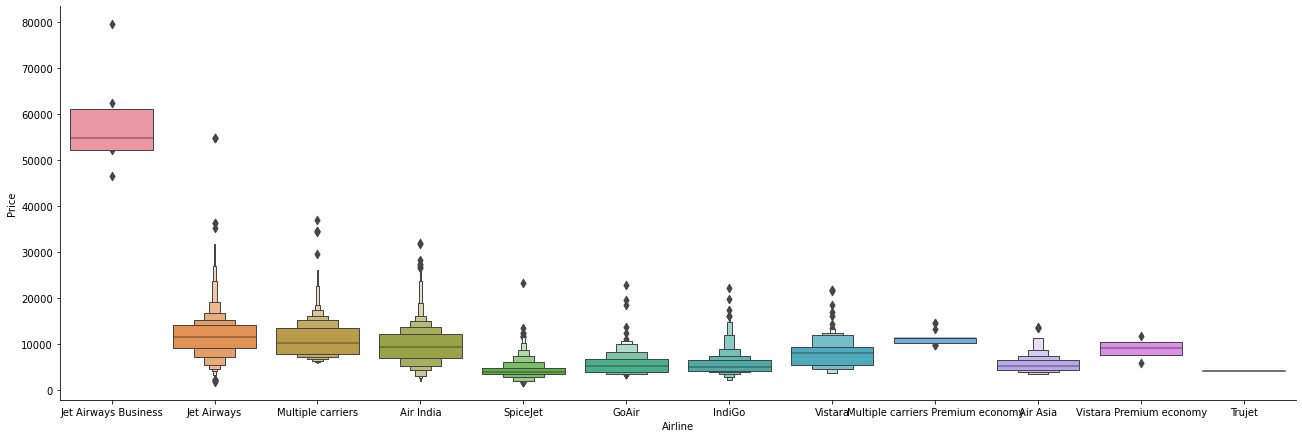

In [32]:
# Graph of Airline vs Price
sns.catplot(y='Price', x='Airline', data=df.sort_values('Price', ascending=False), kind='boxen', height=6, aspect=3)
plt.show()

**Inferences**
 * Here with the help of the cat plot we are trying to plot the boxplot between the price of the flight and airline and we can conclude that Jet Airways has the most outliers in terms of price.

In [33]:
Airline = df['Airline']
Airline = pd.get_dummies(Airline, drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


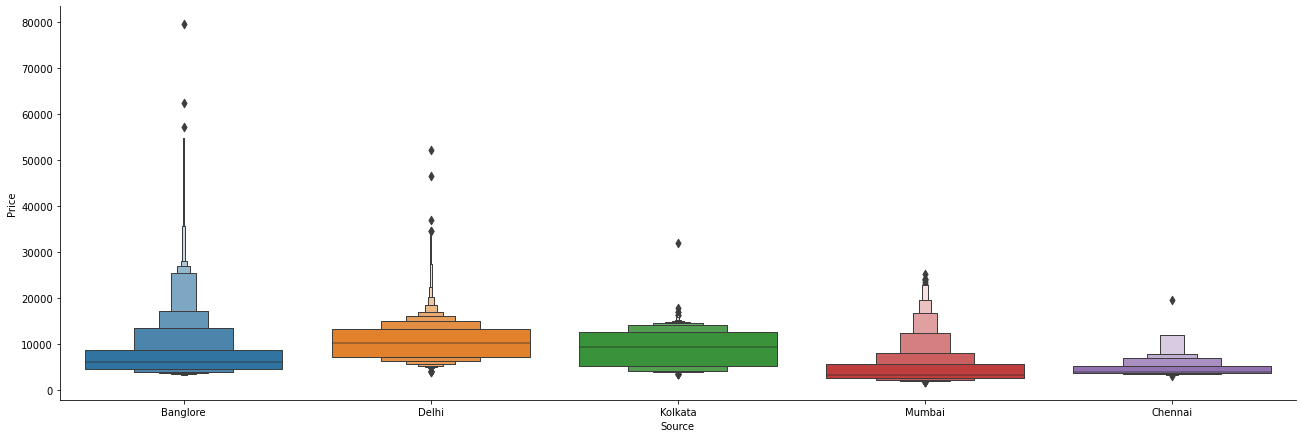

In [34]:
# Graph of Source vs Price
sns.catplot(y='Price', x='Source', data=df.sort_values('Price', ascending=False), kind='boxen', height=6, aspect=3)
plt.show()

**Inference:** 
* Now with the help of cat plot only we are plotting a box plot between the price of the flight and the source place i.e. the place from where passengers will travel to the destination and we can see that Banglore as the source location has the most outliers while Chennai has the least

In [35]:
Source = df['Source']
Source = pd.get_dummies(Source, drop_first=True)

In [36]:
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


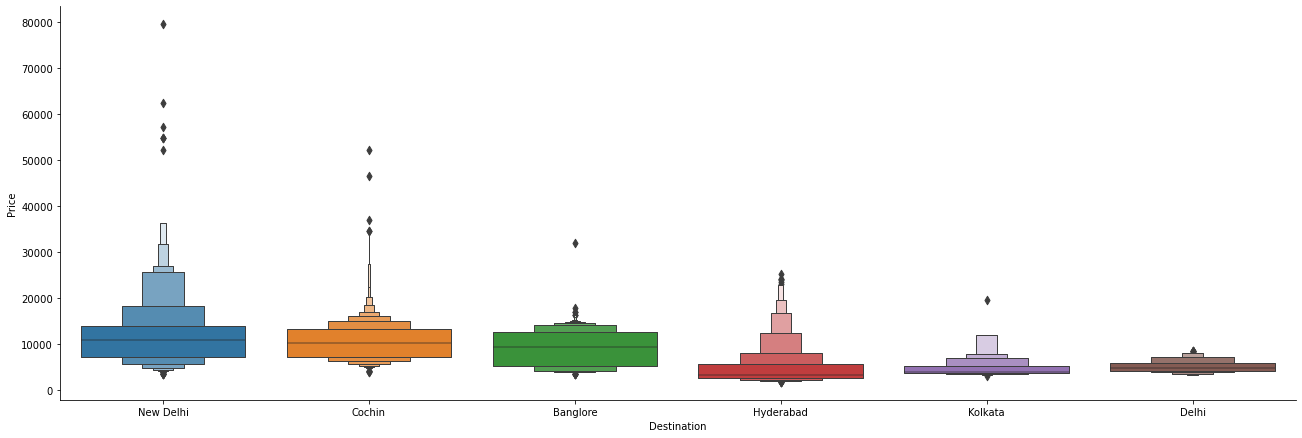

In [37]:
# Graph of Destination vs Price
sns.catplot(y='Price', x='Destination', data=df.sort_values('Price', ascending=False), kind='boxen', height=6, aspect=3)
plt.show()

**Inference:**
* Here we are plotting the box plot with the help of a cat plot between the price of the flight and the destination to which the passenger is travelling and figured out that New Delhi has the most outliers and

In [38]:
Destination = df['Destination']
Destination = pd.get_dummies(Destination, drop_first=True)

In [39]:
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [40]:
df.drop(['Route'], axis=1, inplace=True)

In [41]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,21,35,16,50,4,45


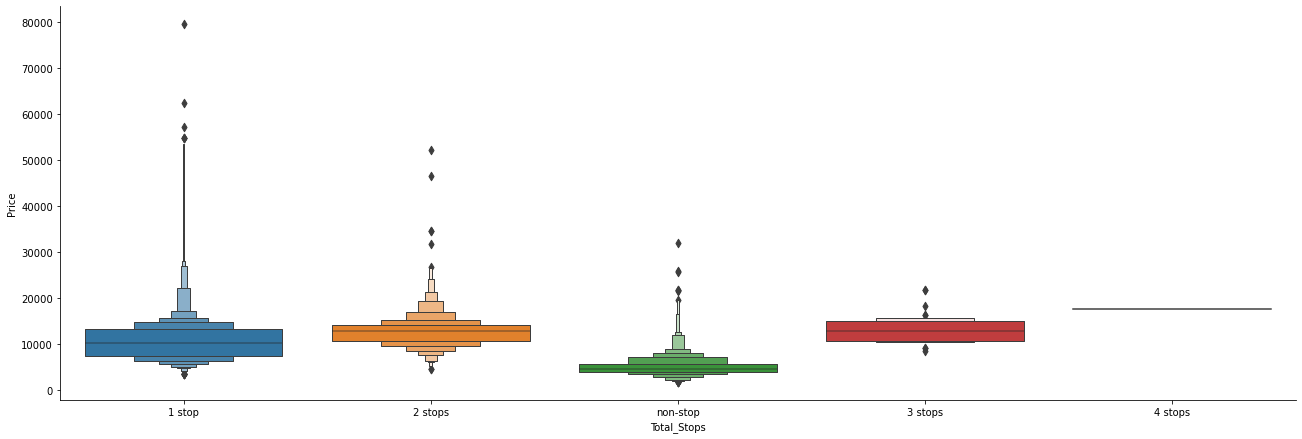

In [42]:
# Graph of Total_Stops vs Price
sns.catplot(y='Price', x='Total_Stops', data=df.sort_values('Price', ascending=False), kind='boxen', height=6, aspect=3)
plt.show()

In [43]:
# Here Total_stop are categorical so we are converting or replacing to 1,2,3,4 in form of Dict
df.replace({'Total_Stops':{'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}},inplace=True)
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,6,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,5,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,1,No info,13302,1,3,21,35,16,50,4,45


In [44]:
# Droping Additional_Info bcz here no relation 
df.drop(['Additional_Info'], axis=1, inplace=True)
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,0,3897,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,21,35,16,50,4,45


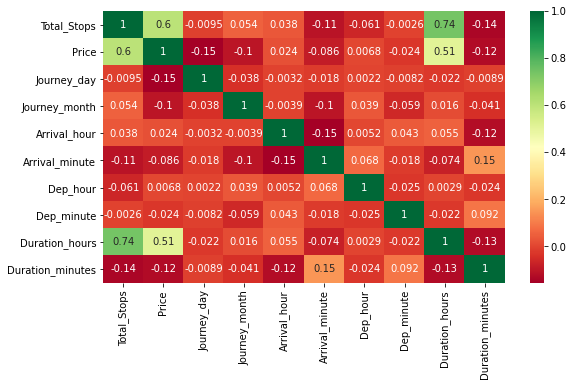

In [46]:
plt.figure(figsize=(9,5))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")
plt.show()

In [109]:
# Conactenate Dataframe
df1 = pd.concat([df, Airline, Source, Destination], axis=1)
df1.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Arrival_hour,Arrival_minute,Dep_hour,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,1,10,22,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Air India,Kolkata,Banglore,2,7662,1,5,13,15,5,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,4,25,9,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,23,30,18,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,21,35,16,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Plotting Bar chart for Types of Airline vs Number of Flights

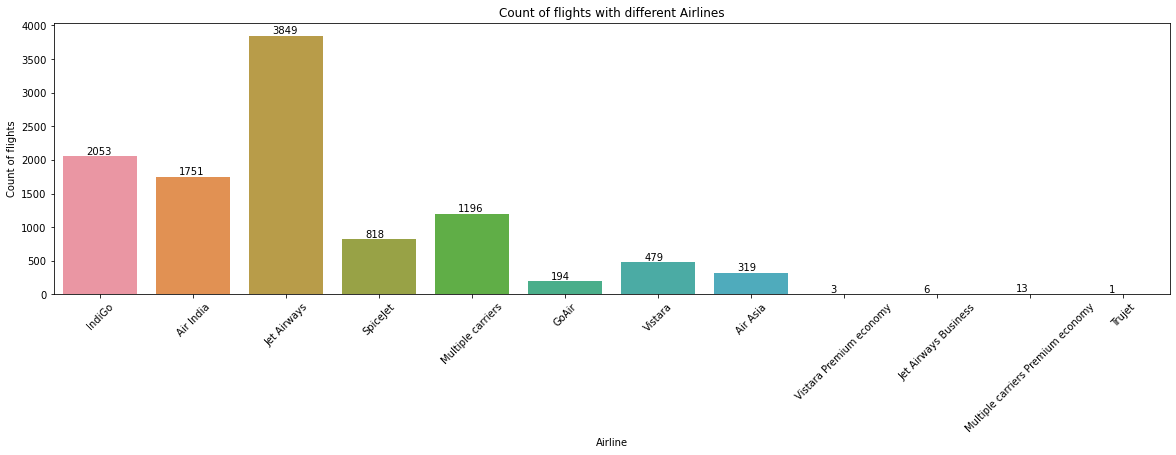

In [110]:
plt.figure(figsize = (20,5))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Airline', data =df1)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')

**Inference:**
* Now from the above graph we can see that between the type of airline and count of flights we can see that Jet Airways has the most flight boarded.

### Plotting Ticket Prices VS Airlines

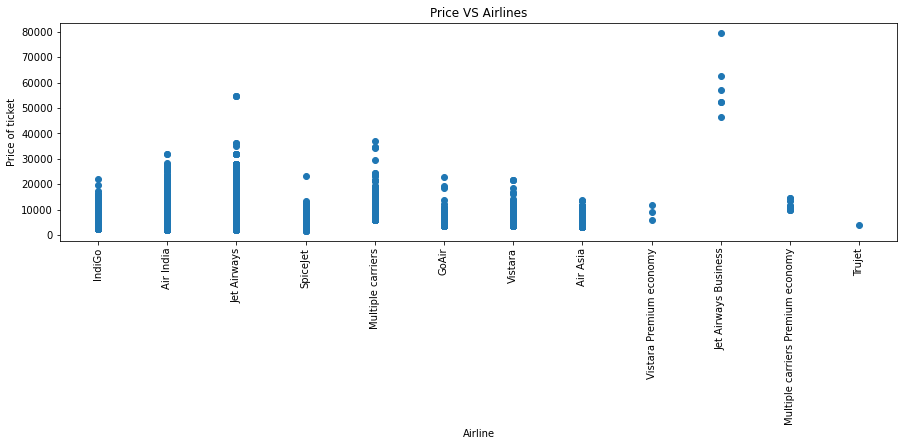

In [114]:
plt.figure(figsize = (15,4))
plt.title('Price VS Airlines')
plt.scatter(df1['Airline'], df1['Price'])
plt.xticks
plt.xlabel('Airline')
plt.ylabel('Price of ticket')
plt.xticks(rotation = 90)
plt.show()

In [43]:
# Here we are droping 'Airline', 'Source', 'Destination' because no need for training this columns.
df1.drop(['Airline', 'Source', 'Destination'], axis=1, inplace=True)
df1.head()

,Total_Stops,Price,Journey_day,Journey_month,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Duration_hours,Duration_minutes,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,24,3,1,10,22,20,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,13,15,5,50,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,4,25,9,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,23,30,18,5,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,21,35,16,50,4,45,...,0,0,0,0,0,0,0,0,0,1


In [44]:
df1.shape

(10682, 30)

### Plotting Bar chart for Months (Duration) vs Number of Flights

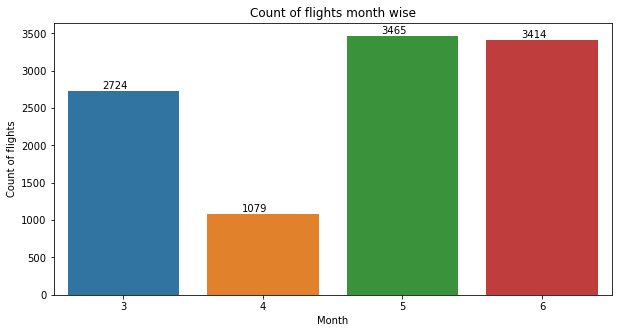

In [105]:
plt.figure(figsize = (10, 5))
plt.title('Count of flights month wise')
ax=sns.countplot(x = 'Journey_month', data = df1)
plt.xlabel('Month')
plt.ylabel('Count of flights')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')

### Plotting Bar chart for Types of Airline vs Number of Flights



#### Working on Test Data

In [49]:
df_test = pd.read_excel('./Data/Test_set.xlsx')

In [50]:
df_test.shape

(2671, 10)

In [51]:
df_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [47]:
df_test.dropna(inplace=True)

In [52]:
df_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [53]:
df_test.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


In [ ]:

df_test['Date_of_Journey'] = pd.to_datetime(df_test.Date_of_Journey, format='%d/%m/%Y')
df_test['Journey_day'] = df_test['Date_of_Journey'].dt.day
df_test['Journey_month'] = df_test['Date_of_Journey'].dt.month
df_test.drop(['Date_of_Journey'], axis=1, inplace=True)

# Handiling Arrival Time

df_test['Arrival_Time'] = pd.to_datetime(df_test.Arrival_Time)
df_test['Arrival_hour'] = df_test['Arrival_Time'].dt.hour
df_test['Arrival_minute'] = df_test['Arrival_Time'].dt.minute
df_test.drop(['Arrival_Time'], axis=1, inplace=True)

# Handiling Departure Time 

df_test['Dep_Time'] = pd.to_datetime(df_test.Dep_Time)
df_test['Dep_hour'] = df_test['Dep_Time'].dt.hour
df_test['Dep_minute'] = df_test['Dep_Time'].dt.minute
df_test.drop(['Dep_Time'], axis=1, inplace=True)

In [66]:
# Assigning and converting Duration column into list to extract values one-by-one in for-loop
duration = list(df_test["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute #why strip is used here?
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration
    
#adding columns 'Duration_hours' and 'Duration_minutes' into dataset 'train_data'
df_test['Duration_hours'] = duration_hours
df_test['Duration_minutes'] = duration_mins

In [67]:
df_test.drop(['Duration'], axis=1, inplace=True)

In [68]:
Airline = df_test['Airline']
Airline = pd.get_dummies(Airline, drop_first=True)

In [69]:
Source = df_test['Source']
Source = pd.get_dummies(Source, drop_first=True)

In [70]:
Destination = df_test['Destination']
Destination = pd.get_dummies(Destination, drop_first=True)

In [71]:
df_test.drop(['Route'], axis=1, inplace=True)

In [72]:
df_test.replace({'Total_Stops':{'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}},inplace=True)
df_test.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Journey_day,Journey_month,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Duration_hours,Duration_minutes
0,Jet Airways,Delhi,Cochin,1,No info,6,6,4,25,17,30,10,55
1,IndiGo,Kolkata,Banglore,1,No info,12,5,10,20,6,20,4,0
2,Jet Airways,Delhi,Cochin,1,In-flight meal not included,21,5,19,0,19,15,23,45
3,Multiple carriers,Delhi,Cochin,1,No info,21,5,21,0,8,0,13,0
4,Air Asia,Banglore,Delhi,0,No info,24,6,2,45,23,55,2,50


In [73]:
df_test.drop(['Additional_Info'], axis=1, inplace=True)

In [74]:
df_test = pd.concat([df_test, Airline, Source, Destination], axis=1)

In [75]:
df_test.drop(['Airline', 'Source', 'Destination'], axis=1, inplace=True)

In [76]:
print(df_test.shape)

(2671, 28)


In [77]:
print(df_test.columns)
print(df.columns)

Index(['Total_Stops', 'Journey_day', 'Journey_month', 'Arrival_hour',
       'Arrival_minute', 'Dep_hour', 'Dep_minute', 'Duration_hours',
       'Duration_minutes', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi'],
      dtype='object')
Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price',
       'Journey_day', 'Journey_month', 'Arrival_hour', 'Arrival_minute',
       'Dep_hour', 'Dep_minute', 'Duration_hours', 'Duration_minutes'],
      dtype='object')


In [78]:
df_test.head()

,Total_Stops,Journey_day,Journey_month,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Duration_hours,Duration_minutes,Air India,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,4,25,17,30,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,10,20,6,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,0,19,15,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,21,0,8,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,2,45,23,55,2,50,0,...,0,0,0,0,0,0,1,0,0,0


#### Feature Selection

In [79]:
df1.shape

(10682, 30)

In [80]:
df1.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Arrival_hour',
       'Arrival_minute', 'Dep_hour', 'Dep_minute', 'Duration_hours',
       'Duration_minutes', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi'],
      dtype='object')

In [81]:
X = df1.drop(['Price'], axis=1)
Y = df1['Price']
X.head()
Y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [82]:
from sklearn.ensemble import ExtraTreesRegressor
select = ExtraTreesRegressor()
select.fit(X,Y)

ExtraTreesRegressor()

In [83]:
print(select.feature_importances_)

[2.35545057e-01 1.45283991e-01 5.25587948e-02 2.80565767e-02
 1.99959989e-02 2.39603789e-02 2.09867161e-02 1.06842515e-01
 1.74642535e-02 8.63910186e-03 1.65091390e-03 1.56383995e-02
 1.43802845e-01 6.77596406e-02 2.15526383e-02 8.86148624e-04
 2.68824371e-03 8.69644844e-05 4.99946709e-03 9.24816992e-05
 5.35122592e-04 7.52697313e-03 3.06513834e-03 7.86984405e-03
 1.03564829e-02 1.92137077e-02 7.58224862e-03 3.75204743e-04
 2.49841513e-02]


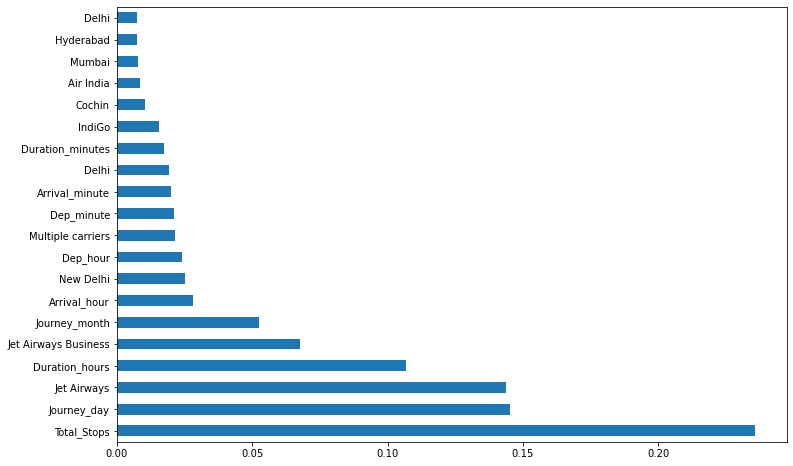

In [84]:
plt.figure(figsize = (12,8))
fig_importances = pd.Series(select.feature_importances_, index=X.columns)
fig_importances.nlargest(20).plot(kind='barh')
plt.show()

#### Model Fiting

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [86]:
from sklearn.ensemble import RandomForestRegressor
RF_reg = RandomForestRegressor()
RF_reg.fit(X_train, Y_train)

RandomForestRegressor()

In [87]:
Y_pred = RF_reg.predict(X_test)

In [88]:
RF_reg.score(X_train, Y_train)

0.9533461308555227

In [89]:
RF_reg.score(X_test, Y_test)

0.7975989279777413

In [90]:
# Calculate r2_score
#r2 = metrics.r2_score(Y_test, Y_pred)
#print(r2)

#### Performing Hyperparameter Tuning for better Accuracy 

- RandomizedSearchCV
- GridSearchCV

In [91]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [92]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [93]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
rf_random = RandomizedSearchCV(estimator = RF_reg, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [94]:
rf_random.fit(X_train, Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   5.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [95]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [96]:
prediction = rf_random.predict(X_test)

In [97]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y_test, prediction))
print('MSE:', metrics.mean_squared_error(Y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, prediction)))

MAE: 1164.5238555143005
MSE: 4043823.4383953568
RMSE: 2010.9260151470905


#### Model Saving in pkl format

In [98]:
import joblib

In [99]:
filename = 'flight_pred.sav'
joblib.dump(rf_random, filename)

# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, Y_test)
print(result)

-4043823.4383953568


In [100]:
import pickle
file = open('flight_pred.pkl', 'wb')
pickle.dump(rf_random, file)

In [101]:
model = open('flight_pred.pkl','rb')
forest = pickle.load(model)

In [102]:
Y_prediction = forest.predict(X_test)

In [103]:
metrics.r2_score(Y_test, Y_prediction)

0.8124565033315505